# Ground state search and time evolution in Gate Model

References 

* <a name="nilsen"></a> Nielsen, M., & Chuang, I. (2010). Quantum Computation and Quantum Information: 10th Anniversary Edition. Cambridge: Cambridge University Press. doi:10.1017/CBO9780511976667
* <a name="sakurai"></a> Sakurai, J., & Napolitano, J. (2020). Modern Quantum Mechanics (3rd ed.). Cambridge: Cambridge University Press. doi:10.1017/9781108587280
* <a name="Andrew"></a> Andrew M. Childs, Yuan Su, Minh C. Tran, Nathan Wiebe, and Shuchen Zhu, Theory of Trotter Error with Commutator Scaling, Phys. Rev. X 11, 011020 – Published 1 February 2021
* <a name="McArdle"></a> McArdle, S., Jones, T., Endo, S. et al. Variational ansatz-based quantum simulation of imaginary time evolution. npj Quantum Inf 5, 75 (2019). https://doi.org/10.1038/s41534-019-0187-2

## Why the ground state of the system is important?

The ground state of a quantum system is essentially a stationary state of the system where energy resides at its lowest level. This fundamental characteristic holds profound importance in both physics and optimization.

In Physics:

Understanding the ground state serves as a cornerstone in analyzing the properties of a quantum system. Quantum critical phenomena reveal themselves at certain levels of observation, but the effects intrinsic to the quantum world are most prominently displayed near the ground state. Additionally, the excited states of the system, characterized by higher energy levels, can be described by examining the ground state and transformations from it. These stationary transformations provide a robust framework to understand the system's behavior at various energy levels.

Practically, in many iterative solve algorithm or simulation, the ground state generally be a good starting point of them. Moreover, for optimizers, the ground state is a solution what they ultimately want to get from the system.

Shortly, the importance of the ground state are

for physicsts,

* It represent the systems's behavior in low energy state in quantum world.
* Dynamics of the system is based on the stable state of the system.
* Using Adiabatic theorem and process, we can make transition to another hamiltonian's ground state. 

for optimizers,

* It is a solution itself.
* Knowing existence and specific value of minum state gurantees lots of conviencen in calculation.

Only few examples in quantum mechanics can be solved exactly. 
The remained cases we are forced to use approximation techniques. 

Diagonalization of the Hamiltonian means analying the structure of the Hamiltonian in the language of energy determined by the given state.

## Quantum simulation problem


Time evolution of the system is 

$$|\psi; t_0 \rangle \rightarrow |\psi; t_1 \rangle$$

Assuming we are living in Heisenberg picture.

$$\psi(t) = U(t) \psi$$

and applying Schrodinger equation of time-dependent form

$$i \hbar \frac{d}{dt} | \psi \rangle = H | \psi \rangle$$

Thus, we get

$$i \hbar \frac{d}{dt} U(t) | \psi \rangle = H | \psi \rangle$$

$$i \hbar \frac{d}{dt} U(t) = H$$

General from of time-evolution unitary operator is

$$U(t, 0) = \exp(- i \int_0^t H(t) dt)$$

There are 3 cases about the system Hamiltonian,

1. Hamiltonian of the system is time independent.

$$U(t, t_0) = \exp(- i H/\hbar  \, (t-t_0))$$

2. It is time dependent but $H$ at different times commute.

$$U(t, t_0) = \exp\left[- \frac{i}{\hbar} \int_{t_0}^t H(t') dt' \right]$$

3. Time dependent but not commute at different times.

$$U(t, t_0) = 1+ \sum_{n=1}^\infty \int_{t_0}^t dt_1 \int_{t_0}^{t_1} dt_2 \cdots \int_{t_0}^{t_{n-1}} dt_n \Pi_{i=1}^n H(t_i)$$

The last case expression is known as **Dyson Series**.

With given hamiltoniain $H$ and evolution time $t$, find a unitary transformation $U$ such that

$$||U - e^{-itH}|| < \epsilon$$

The time evolution simultion can be used with different pupose. However, in this document we restrict the purpose to obtain a ground state of the system. 


## Single spin system with time evolution

Fundamental princpal of the physics theory is even we have several different systems if their hamiltonians have same form each other, the system will show same behaviors. The quantum computers is bascially, $N$ number of 1/2 spins system. There are many examples of spin system. For examples,

* Spin of a single electron localized on an imparity in a semiconductor
* Combined spin of several $d$ electrons in a transition=metal-ion.
* Nuclear spin of an atom in a crystal
* Combined spin and orbital moment of a rare-earth ion.

With $N$ number of qubits and operators we can simulate those behaviors on our quantum computer. 
Shortly, Let us simulate simple single spin state with quantum circuit.

This example is refered from "Spin Precession" section of "Modern Quantum Mechanics", Sakurai and Napolitano.

Suppose we have spin 1/2 system with magnetic moment $e\hbar/(2 m_e c)$ subjected to an external magnetic field $\mathbf{B}$. Then, the Hamiltonian of the system is 

$$H = - (\frac{e}{m_e c}) \mathbf{S \cdot B}$$

where, $\mathbf{S}$ is a total spin of the system. Let the system is restricted to $z$ directional uniform magnetic field.

* Hamiltonian : $- \frac{eB}{m_e c} S_z$
* Eigenvalues: $E_{\pm} = \mp \frac{e \hbar B}{2 m_e c}$ for each eigen states, $\pm S_z$.

Let $\omega = \frac{|e|B}{m_e c}$, $H = \omega S_z$, consequently $U(t) = \exp(i (\omega S_z /\hbar) t)$.
If the initial state of the system is $S_x +$, we can calculate the probability of each states, $S_x +, \, S_x -$ as $\cos^2(\omega t /2)$, and $\sin^2(\omega t /2)$ repectively.

$U(t, 0) = \exp(- i \frac{\omega S_z}{\hbar}t) = \exp(-i \frac{\theta_t}{2} \sigma_z)$. Let Plank constant $\hbar =1$ for conveninence in calculation. We have

$$\theta(t) = \omega t$$

In [166]:
# Qubit simulation
import pennylane as qml
from typing import Literal

from math import pi, cos, sin

# System configureration
B = 3E2
me = 9.1093837015E-31
e = 1.602176634E-19
c0 = 299792458
hbar = 6.62607015E-34/(2*pi)

wb = (e*B)/(me*c0)
theta = lambda t: wb*t

In [167]:
shot_n = int(1E4)
dev = qml.device("default.qubit", wires=1, shots=shot_n)

@qml.qnode(dev)
def circuit(t, measure_state:Literal["z", "x", "y"]="z", mode:Literal["sample", "exp"]="sample"):
    qml.Hadamard(wires=0)
    qml.RZ(theta(t), wires=0)
    
    if measure_state != "z":
        qml.Hadamard(wires=0)
        if measure_state =="y":
            qml.adjoint(qml.S(wires=0))
    if mode =="sample":
        return qml.counts()
    else:
        return qml.expval(qml.PauliZ(0))


C:\Users\qwqwh\AppData\Local\Temp\ipykernel_15020\1421198088.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


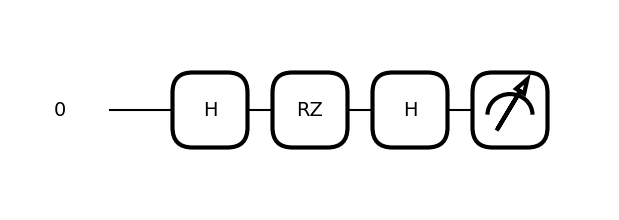

In [168]:
fig, ax =  qml.draw_mpl(circuit)(0.3, "X")
fig.show()

In [182]:
t = 0.05
samples = circuit(t, "x")

print(f"\nState probability approximation \n with {shot_n} sampling")
print("\tSx+:", samples["0"]/shot_n, "Sx-:",samples["1"]/shot_n)
print("Precise probablity")
print("\tSx+:", cos(wb*t/2)**2, "Sx-:", sin(wb*t/2)**2)


State probability approximation 
 with 10000 sampling
	Sx+: 0.0814 Sx-: 0.9186
Precise probablity
	Sx+: 0.08371358969134887 Sx-: 0.9162864103086511


In [183]:
circuit(t, "x", mode="exp")

array(-0.839)

In [184]:
cos(wb*t)

-0.8325728206173023

## Many body system

In the above example, we haven't introduced anything new; we simply described one spin system with another spin system. However, what if the system consists of many bodies with a complicated structure?
We then, are forced to use approximation methods.

In this document, we will focus on finding ground state of the system, especially, with the time evolution process.

Procedure of quantum simulation. 

1. Formulating the system hamiltonian with spin operators.
   1. Usually, they are expressed in system's annihilation and creation operators.
   2. Find a mapping to spin operator. Popular transformations are *Jordan Wigner transformation* and *Bravyi-Kitaev transformation*.
2. Decomposing the hamiltonian into several unitary operations with time steps. You can use *Trotter-Szuki decomposition* of $p$ level.
3. Prepare the measurement sometimes you need to apply QFT to obtain momentum space value from position system.
4. Measurement.

## Adiabatic Theorem and Anealing

Adiabatic theorem states that if the system hamiltonian is varying *slowly*, the final state of the system is remained in eigenstate of finial hamiltonian which is *corresponding* eigenstate of the initial hamiltonian eigenstate. 

For example, if we bring a simple pendulum at ground and slowly climb moutain, without any external manupulation, the pendulum automatically match the period with repect to the reduced gravity field. The term *slowly* is very important, it depends on the initial and final hamiltonian of the system. If the evolution time is $T$ and the eigenvalues of initial and final hamiltonian are $E_{i}$ and $E_{f}$, the evolution time must be satisfies next, see [Sakurai et al](#sakurai),

$$\frac{2 \pi}{|E_{f} - E_{i}|} << T$$

$$H_{qc}(t(s), T) = T(1-f(s)) H_{initial} + T f(s) H_{solve}$$

where, $H_{qc}$ is a hamiltonian being applied to the circuit, $H_{initial}$ is a iniital state hamiltonian, and $H_{solve}$ is a problem hamiltonian we want to solve. $f(s)$ is a monotonic increasing and bounded function $0\leq f(s) \leq 1$

What if the final solution is restricted to the combination of $z$ axis?

In this case, Ising model is used to describe the hamiltonian.

$$H_{solve} = \sum_{i} q_i \sigma_i^z+\sum_{i > j} h_{ij} \sigma_i^z \sigma_j^z$$

The proper inital state would have uniform probabilities for all state to the measurement axis. We can set the inital hamiltonian whose ground state is a combination of Hadamard basis.

$$H_{initial} = - \sum_i \sigma_i^x$$

The common annealing solutions, such as D-Wave and QuEra, also apply the adiabatic theorem to their initialization process and Hamiltonian form. Quantum annealing is fundamentally based on the phenomenon of quantum fluctuation; however, the starting and final stages, as well as the evolving process, follow the adiabatic theorem. That is why they offer some annealing time and initial state parameters to the user API. Some problems require much more time to achieve the appropriate adiabatic process

See [D-Wave's anealing document](https://docs.dwavesys.com/docs/latest/c_gs_2.html)


## Simulating Adiabatic process with Gate model

Now we know that the gate model quantum computer is one type of **universal** quantum computing model. 
However, the universality does not means a convenience model for all routine and solution. 
In anealing processor, we can find a good approximation of the ground state of the system. 
However, if we want to implment the process in gate model system, because of restriction of the current devices, noise, there are many resitriction and block walls.

Basically, simulating time evolution with gate model is a iterative solve process of differenial equation, like Euler method, in a speech of figure.

### Product Fomulation

See details in [Andrew et al](#Andrew)

It is commonly known as "Trotter-Sukuki Decomposition" of the given Hamiltonian

$$\exp(i \sum H_i t) \approx (\phi)^N$$

The benefit of the product formulation is ancilla free time evolution method. It means we do not need any ancilla registers to conduct time evolution operation to the state.

#### Error of the Trotter decomposiiton

Baker Campbell Hausdorff formula

For given evolution time $t$ and two hamiltonian $H = H_1 + H_2$, 

$$\exp(i t H) = \exp(i t (H_1 + H_2) + BCH(H ,t))$$

where, $BCM(H)$ is a Baker-Campbell-Hausdoff formula

$$- \frac{t^2}{2} [H_2, H_1] + i \frac{t^3}{12} ([H_2, [H_2, H_1]] - [H_1, [H_2, H_1]]) + \dots$$


We know well known time-evolution circuit of pauli-basis form as 


## VQE approach

Considering the first definition of the *quantum simulation*.
We want to find an unitary transformation corresponding the given Hamiltonian $H$ such that, $||U - \exp(-i H t)|| < \epsilon$ with a given error $\epsilon$.

The time evolution simulation is a good example of a physics law-based method, and in several cases, it can generate good results. The product model frequently used in time-evolution implementation has some advantages, as it preserves the locality of the system, is practical in commutativity systems, and does not require ancilla. However, the required depth of the circuit for accurate results becomes huge as the size of the system increases. Due to the current device's operational errors, minimizing the circuit's depth is a significant consideration, in general situation.

One good point is measurement *expectation* value of the Hamiltonain represented with spin operators requiring much less gates then time-evolution circuit.
Whatever process the system has gone through, it is sufficient if only the expected value is minimized.

* Ansatz for general state of $N$ qubit system.
* Spin operator hamiltonian being of concern.
* Classic optimization algorithm.


See [McArdle et al](#McArdle) as an example.

In [185]:
# Comparing time-evolution and VQE approach

## Quantum Walk

Quantum search algorithm is an example of quantum walk technique in circuit model. See chapter 6.2 of [Nilsen and Chuang](#nilsen)